Success! File loaded.


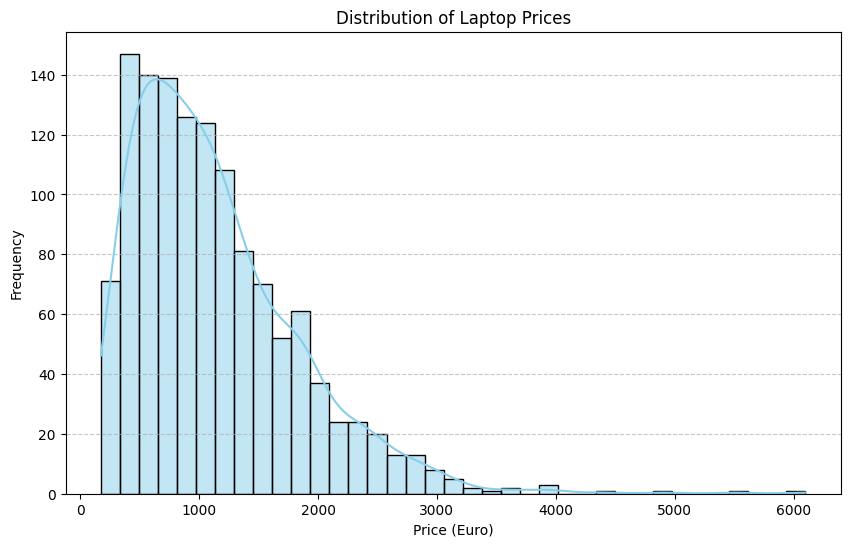


--- Average Price per Company ---
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

The company with the most expensive laptops on average is: Razer

Unique OS before cleaning: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


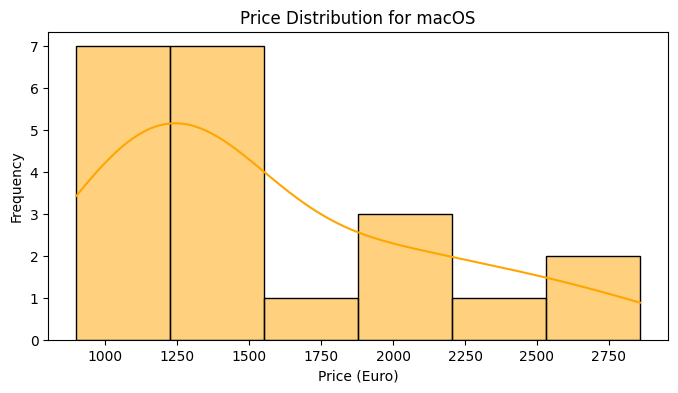

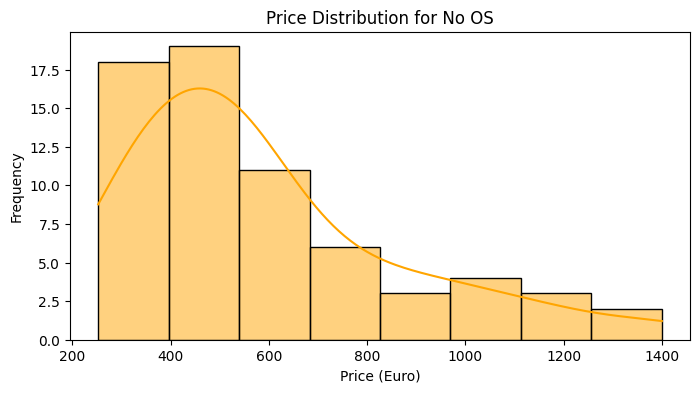

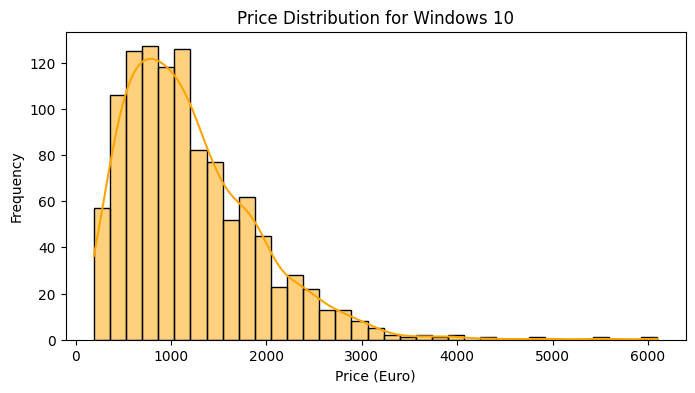

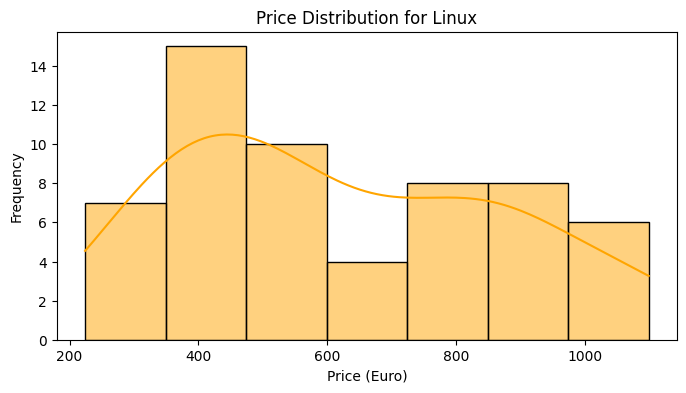

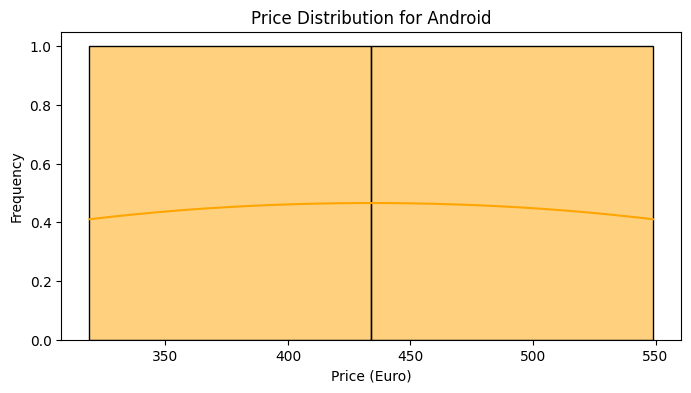

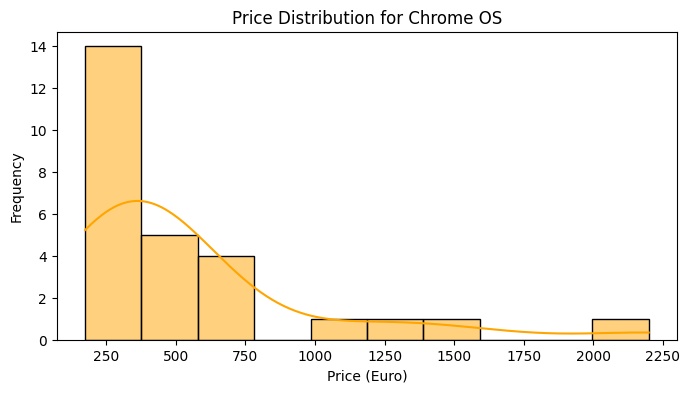

KeyError: 'Ram'

In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# הגדרת נתיב וטעינת הקובץ
notebook_path = os.path.abspath("") 
file_path = os.path.join(notebook_path, 'laptop_price - dataset.csv')

try:
    df = pd.read_csv(file_path, encoding='latin-1')
    print("Success! File loaded.")
except FileNotFoundError:
    print("Error: Could not find the file. Please ensure it's in the same folder.")

# ---------------------------------------------------------
# Part 1: Initial Plotting & Statistics
# ---------------------------------------------------------

# 1. Plot the price of all the laptops
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (Euro)'], kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Average laptop price for each company
avg_price_per_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
most_expensive_company = avg_price_per_company.idxmax()

print("\n--- Average Price per Company ---")
print(avg_price_per_company)
print(f"\nThe company with the most expensive laptops on average is: {most_expensive_company}")

# ---------------------------------------------------------
# Part 2: Data Cleaning - Operating Systems
# ---------------------------------------------------------

# 3. Find unique OS and fix them to be uniform
print("\nUnique OS before cleaning:", df['OpSys'].unique())

# תיקון שמות: איחוד גרסאות שונות של אותה מערכת הפעלה
os_mapping = {
    'Mac OS X': 'macOS',
    'Windows 10 S': 'Windows 10',
    'Windows 7': 'Windows 10' # דוגמה לאיחוד, תלוי בהנחיות המרצה
}
df['OpSys'] = df['OpSys'].replace(os_mapping)
unique_os = df['OpSys'].unique()

# 4. Plot distribution of prices for EACH operating system
for system in unique_os:
    plt.figure(figsize=(8, 4))
    subset = df[df['OpSys'] == system]
    sns.histplot(subset['Price (Euro)'], kde=True, color='orange')
    plt.title(f'Price Distribution for {system}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Frequency')
    plt.show()

# ---------------------------------------------------------
# Part 3: Relationship between RAM and Price
# ---------------------------------------------------------

# 5. Relationship between RAM and computer price
# ניקוי עמודת ה-RAM (הפיכה למספר)
df['RAM_numeric'] = df['Ram'].str.replace('GB', '').astype(int)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM_numeric', y='Price (Euro)', alpha=0.6)
plt.title('Relationship between RAM and Laptop Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.show()

"""
--- Outlier Detection Explanation ---
An outlier is a data point that differs significantly from other observations.
In this dataset, a laptop with 64GB RAM but a very low price, or a 4GB RAM laptop 
costing 4000 Euro, would be considered an outlier.

How to detect it? 
We can use the Interquartile Range (IQR) method:
"""
# ---------------------------------------------------------
# Part 4: Feature Engineering - Storage Type
# ---------------------------------------------------------

# 6. Create "Storage type" column from "Memory"
# הפונקציה מחלצת את הסוג (SSD/HDD/Flash וכו') - לרוב המילה האחרונה או השנייה בתיאור
df['Storage type'] = df['Memory'].str.split().str[-1]

print("\n--- First 5 rows with 'Storage type' ---")
print(df[['Memory', 'Storage type']].head())

# שמירת התוצאה
# df.to_csv('cleaned_laptop_prices.csv', index=False)